The value of the hook with highest stress is 1.2299999999999998
Each stress must equal: 1
For hook 1.00: intial stress: 0.32 ; stress difference = -0.55
For hook 2.00: intial stress: 1.23 ; stress difference = 0.36
For hook 3.00: intial stress: 1.00 ; stress difference = 0.13
For hook 4.00: intial stress: 1.10 ; stress difference = 0.23
For hook 5.00: intial stress: 0.68 ; stress difference = -0.19


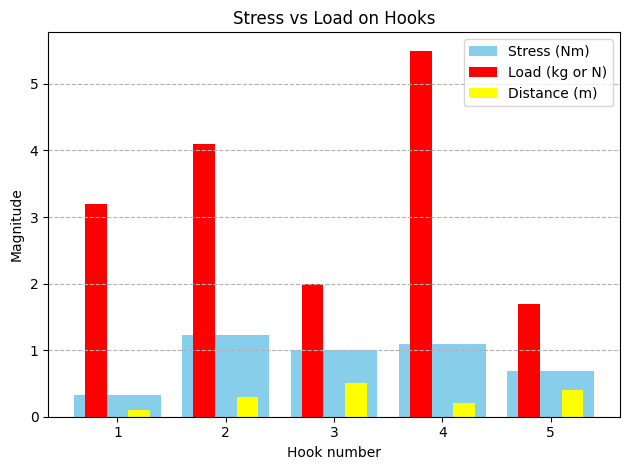

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#Data
loads = [3.2,4.1,2.0,5.5,1.7]
distances = [0.1, 0.3, 0.5, 0.2, 0.4]
stressList= []

for load,distance in zip(loads,distances):
  stress = load * distance
  stressList.append(stress)

highestStress = max(stressList)
print(f"The value of the hook with highest stress is {highestStress}")

hookIndices = np.arange(1, len(stressList) + 1)
barWidth = 0.4 #Bar width for slight offset

#Blue bar
plt.bar(hookIndices, stressList, color='skyblue', label='Stress (Nm)') #What is plt bar for?
#Red bar
plt.bar((hookIndices - 0.2), loads, width=barWidth / 2, color='red', label='Load (kg or N)')
#Yellow bar (distance)
plt.bar(hookIndices + 0.2, distances, width=barWidth / 2, color='yellow', label='Distance (m)')

#Total stress and stress for each hook
total_stress = sum(stressList)
each_stress = total_stress / len(hookIndices)
print(f"Each stress must equal: {round(each_stress)}")
for i in range(len(hookIndices)):
  print(f'For hook {hookIndices[i]:.2f}: intial stress: {stressList[i]:.2f} ; stress difference = {(stressList[i]-each_stress):.2f}')

#Plot it
plt.xlabel('Hook number')
plt.ylabel('Magnitude')
plt.title('Stress vs Load on Hooks')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#Data
loads = [3.2,4.1,2.0,5.5,1.7]
distances = [0.1, 0.3, 0.5, 0.2, 0.4]
stressList= []

for load,distance in zip(loads,distances):
  stress = load * distance
  stressList.append(stress)

highestStress = max(stressList)
print(f"The value of the hook with highest stress is {highestStress}")

hookIndices = np.arange(1, len(stressList) + 1)

print(hookIndices)

The value of the hook with highest stress is 1.2299999999999998
[1 2 3 4 5]


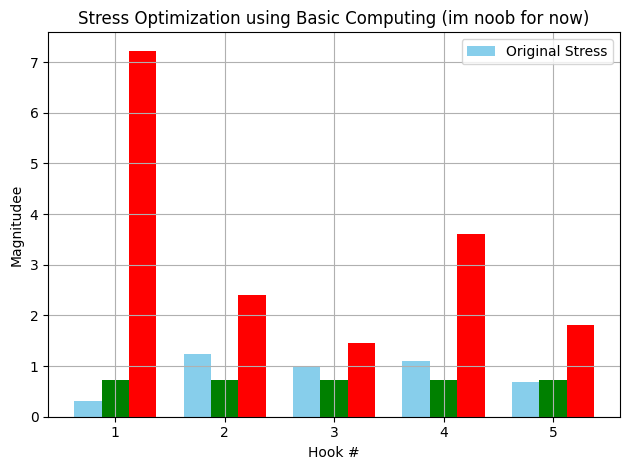

Original Loads:      [3.2 4.1 2.  5.5 1.7]
Optimized Loads:      [7.23 2.41 1.45 3.61 1.81]
Original Stress:      [0.32 1.23 1.   1.1  0.68]
Optimized Stress:      [0.72 0.72 0.72 0.72 0.72]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize # Added for optimization!?!

#Initial data
original_loads = np.array([3.2, 4.1, 2.0, 5.5, 1.7])
distances = np.array([0.1, 0.3, 0.5, 0.2, 0.4])

# Functions to compute stress for given loads
def compute_stress(loads, distances):
  return loads * distances #Element-wise multiplication

#Objective: minimize stress variance
def stress_variance(loads):
  stress = compute_stress(loads, distances) # /// I don't get this part, help
  return np.var(stress) # // Variance is a measure of imbalance

#Constraint: Total load must stay the same
def total_load_constraint(loads):
  return np.sum(loads) - np.sum(original_loads) #///What is this even for i don't understand the code logic.

#Bounds: Load on each hook must be >= 0
bounds = [(0, None) for _ in range(len(original_loads))] # /// Alright i get nothing in this line

#Constraint in dict form
constraints = {'type': 'eq', 'fun': total_load_constraint}

#Start optimization
result = minimize(stress_variance,
                  original_loads.copy(),
                  method='SLSQP',
                  bounds=bounds,
                  constraints=constraints) #/// Oh so those upper lines are for this library codes. I don't get it though

# Optimized loads
optimized_loads = result.x
optimized_stress = compute_stress(optimized_loads, distances) #/// What the hell? I don't get it

#Visualize results
hook_indices = np.arange(1, len(original_loads +1) + 1 )
bar_width = 0.25

plt.bar(hook_indices - bar_width, compute_stress(original_loads, distances),
        width=bar_width, label='Original Stress', color='skyblue')
plt.bar(hook_indices, optimized_stress, width=bar_width, color='green')
plt.bar(hook_indices + bar_width, optimized_loads, width=bar_width, color='red')

plt.xlabel('Hook #')
plt.ylabel('Magnitudee')
plt.title('Stress Optimization using Basic Computing (im noob for now)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Report
print('Original Loads:     ', np.round(original_loads, 2)) #/// Wait this one is basically :.2f huh? and if its org_loads, 3 then :.3f??? is it
print('Optimized Loads:     ', np.round(optimized_loads, 2))
print('Original Stress:     ', np.round(compute_stress(original_loads, distances), 2)) #/// At this point why don't you just make an independent var called "stress", why always compute_stress?
print('Optimized Stress:     ', np.round(optimized_stress, 2))